In [2]:
import cifar10
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [4]:
cifar10.data_path = "data/CIFAR-10/"

In [5]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [7]:
images_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [6]:
cls_train.shape

(50000,)

In [7]:
labels_train.shape

(50000, 10)

In [8]:
images_train.shape

(50000, 32, 32, 3)

In [10]:
images_train.shape

(50000, 32, 32, 3)

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(images_train, cls_train, epochs=10 ,validation_data=(images_test, cls_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.6329 - acc: 0.3949 - val_loss: 1.4038 - val_acc: 0.4852
Epoch 2/10
50000/50000 [==============================] - 48s 955us/sample - loss: 1.3037 - acc: 0.5312 - val_loss: 1.2735 - val_acc: 0.5374
Epoch 3/10
50000/50000 [==============================] - 48s 962us/sample - loss: 1.1908 - acc: 0.5759 - val_loss: 1.2268 - val_acc: 0.5557
Epoch 4/10
50000/50000 [==============================] - 47s 948us/sample - loss: 1.1194 - acc: 0.6041 - val_loss: 1.1274 - val_acc: 0.6018
Epoch 5/10
50000/50000 [==============================] - 49s 985us/sample - loss: 1.0645 - acc: 0.6257 - val_loss: 1.0856 - val_acc: 0.6126
Epoch 6/10
50000/50000 [==============================] - 49s 973us/sample - loss: 1.0197 - acc: 0.6410 - val_loss: 1.0467 - val_acc: 0.6291
Epoch 7/10
50000/50000 [==============================] - 49s 977us/sample - loss: 0.9784 - acc: 0.6542 - 

In [17]:
predictions = model.predict(images_test)
score = model.evaluate(images_test, cls_test)
score

10000/10000 [==============================] - 2s 225us/sample - loss: 1.0127 - acc: 0.6454


[1.0127183933258057, 0.6454]

In [18]:
pred = tf.argmax(predictions, 1)

In [19]:
sess = tf.Session()
a = sess.run(pred)

In [20]:
import numpy as np

In [21]:
np.savetxt("test.csv", a, delimiter=",")

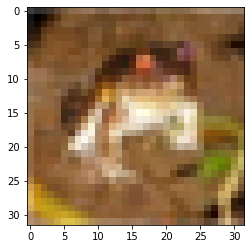

In [13]:
plt.imshow(images_train[0])